In [47]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from sympy import symbols, integrate, exp, latex
from eztcolors import Colors as C

from src.hdu.cubes.cube import Cube

In [45]:
def calculate_column_density(arr: np.ndarray):
    """
    Calculates the column density for each gaussian (line) in the given array. The log10 of the result is returned.
    """
    # Compute the integral
    # x, A, sigma = symbols('x A sigma')
    # f = integrate(A * exp(-x**2 / (2*sigma**2)), x)
    # print(latex(f))
    # This function's output and simplification is given in the cell below

    # The error function is odd and thus passes through the origin
    # We can then compute the gaussian's area using twice the error function's value at high x
    # The gaussian's stddev is relatively small so an arbitrary value of 1000 is chosen to evaluate the error function
    x = 1000
    return 1.82e18 * 2*(arr[:,2] * arr[:,4] * np.sqrt(np.pi/2) * scipy.special.erf(x / (np.sqrt(2)*arr[:,4])))

$$\frac{\sqrt{2} \sqrt{\pi} A \operatorname{erf}{\left(\frac{\sqrt{2} x \sqrt{\frac{1}{\sigma^{2}}}}{2} \right)}}{2 \sqrt{\frac{1}{\sigma^{2}}}}=A\sigma\sqrt\frac{\pi}{2}\operatorname{erf}{\left(\frac x{\sqrt2\sigma}\right)}$$

# Loop4

/var/folders/z8/44crt9313mlc559ypygm9ptw0000gn/T/ipykernel_60123/191822016.py:3: RuntimeWarning: divide by zero encountered in log10
  column_density_array = np.log10(calculate_column_density(array) / 1e20)


Saving


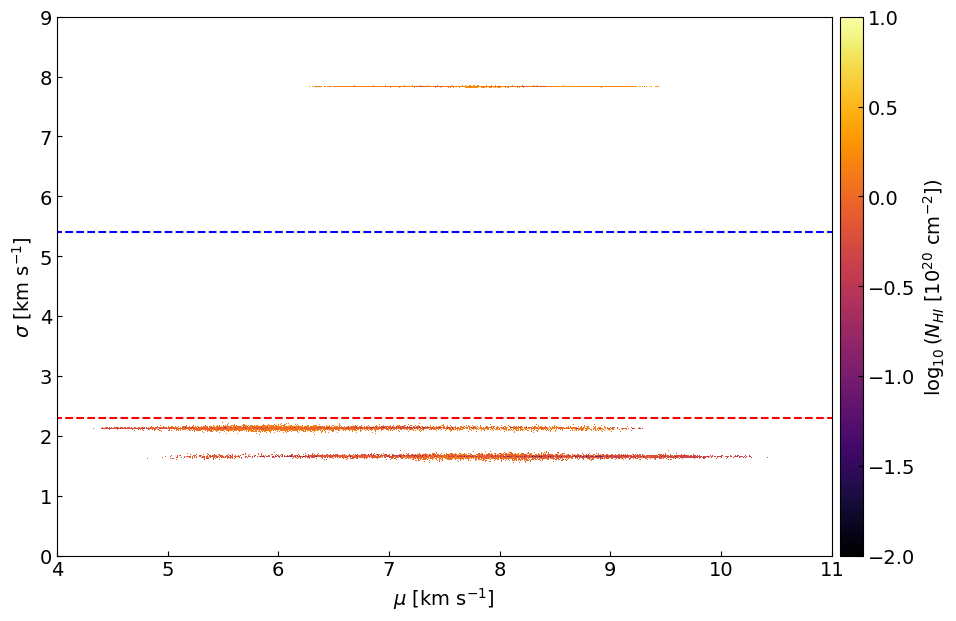

In [54]:
array = np.loadtxt("data/graph_gaussians/LOOP4_cube_gauss_run_0.dat")
header = Cube.load("summer_2023/HI_regions/data_cubes/LOOP4/LOOP4_FINAL_GLS.fits").header
column_density_array = np.log10(calculate_column_density(array) / 1e20)

fig, ax = plt.subplots(1, figsize=(10,7))
plt.rcParams["font.size"] = 14
plt.rcParams["font.serif"] = "Computer Modern"

convert_func = np.vectorize(header.get_value)

sc = ax.scatter(
    x=convert_func(array[:,3]) / 1000,      # Convert: channel -> m/s -> km/s
    y=array[:,4]*np.abs(header["CDELT3"] / 1000),
    s=0.05,
    c=column_density_array,
    cmap=mpl.cm.inferno,
    marker=",",
    edgecolor="none",
    vmin=-2,
    vmax=1
)

# Lines
plt.plot([0, 20], [5.4, 5.4], linestyle="--", color="blue", linewidth=1.5)
plt.plot([0, 20], [2.3, 2.3], linestyle="--", color="red", linewidth=1.5)

cbar = fig.colorbar(sc, cax=ax.inset_axes([1.01, 0, .03, 1]))

cbar.set_label(r"$\log_{10}(N_{HI}\ [10^{20}\mathrm{\ cm}^{-2}])$")
cbar.ax.tick_params(axis="both", direction="in")
ax.set_xlabel(r"$\mu$ [km s$^{-1}$]", fontsize=plt.rcParams["font.size"])
ax.set_ylabel(r"$\sigma$ [km s$^{-1}$]", fontsize=plt.rcParams["font.size"])

ax.set_xlim(4, 11)
ax.set_ylim(0, 9)

plt.tick_params(axis="both", direction="in", labelsize=plt.rcParams["font.size"])
print(f"{C.LIGHT_CYAN}Saving")
plt.savefig("figures/graph_gaussians/loop4_new.pdf", bbox_inches="tight", dpi=900)

# Spider

/var/folders/z8/44crt9313mlc559ypygm9ptw0000gn/T/ipykernel_60123/3064780899.py:2: RuntimeWarning: divide by zero encountered in log10
  column_density_array = np.log10(calculate_column_density(array) / 1e20)


Saving


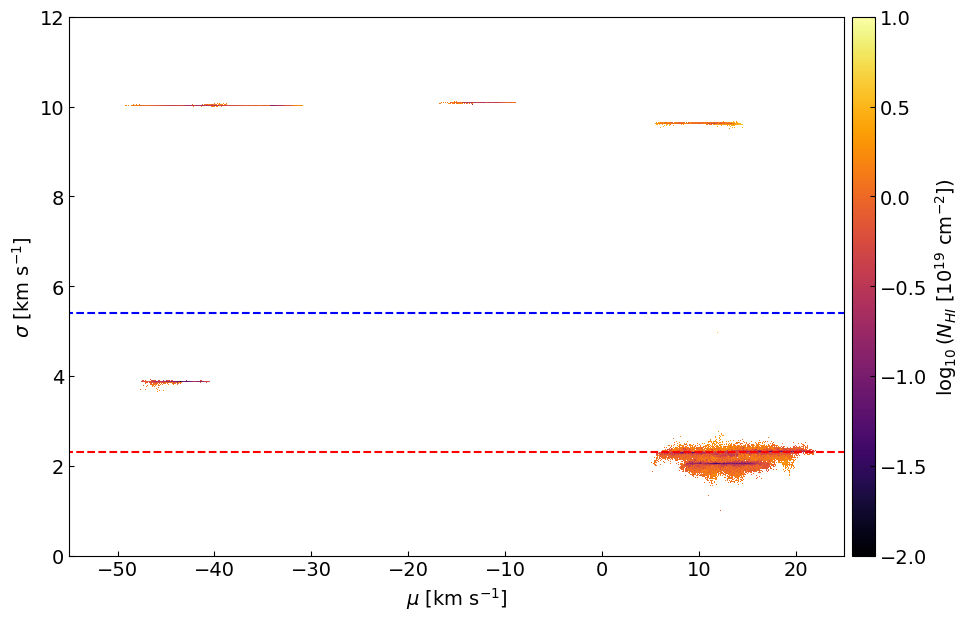

In [61]:
array = np.loadtxt("data/graph_gaussians/DF_gauss_run_0.dat")#[:500000,:]
column_density_array = np.log10(calculate_column_density(array) / 1e20)

fig, ax = plt.subplots(1, figsize=(10,7))
plt.rcParams["font.size"] = 14
plt.rcParams["font.serif"] = "Computer Modern"

# Data
header = Cube.load("summer_2023/HI_regions/data_cubes/spider/Spider_bin4.fits").header
convert_func = np.vectorize(header.get_value)

sc = ax.scatter(
    x=convert_func(array[:,3])/1000,      # Convert channel -> m/s -> km/s
    y=array[:,4]*np.abs(header["CDELT3"] / 1000),
    s=0.05,
    c=column_density_array,
    cmap=mpl.cm.inferno,
    marker=",",
    edgecolor="none",
    vmin=-2,
    vmax=1,
)

# Lines
plt.plot([-100, 100], [5.4, 5.4], linestyle="--", color="blue", linewidth=1.5)
plt.plot([-100, 100], [2.3, 2.3], linestyle="--", color="red", linewidth=1.5)


cbar = fig.colorbar(sc, cax=ax.inset_axes([1.01, 0, .03, 1]))

cbar.set_label(r"$\log_{10}(N_{HI}\ [10^{19}\mathrm{\ cm}^{-2}])$")
cbar.ax.tick_params(axis="both", direction="in")
ax.set_xlabel(r"$\mu$ [km s$^{-1}$]", fontsize=plt.rcParams["font.size"])
ax.set_ylabel(r"$\sigma$ [km s$^{-1}$]", fontsize=plt.rcParams["font.size"])

ax.set_xlim(-55, 25)
ax.set_ylim(0, 12)

plt.tick_params(axis="both", direction="in", labelsize=plt.rcParams["font.size"])
print(f"{C.LIGHT_CYAN}Saving")
plt.savefig("figures/graph_gaussians/spider_new_3.png", bbox_inches="tight", dpi=600)